# Overview

This week is all about working with data. I'm not going to lie to you. This part might be frustrating - but frustration is an integral part of learning. Real data is almost always messy & difficult ... and learning to deal with that fact, is a key part of being a data scientist. 

Enough about the process, let's get to the content! Welcome to ... (drumroll drumroll drumroll)

# <center> The Legend of Zelda: Breath of the Wild </center>

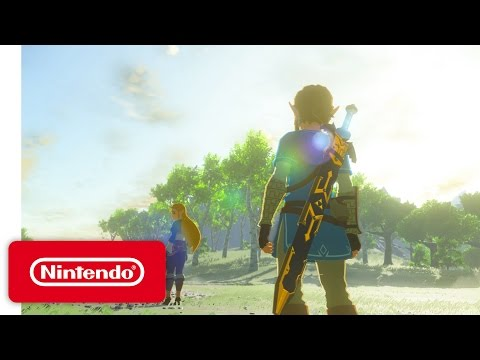

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("zw47_q9wbBE",width=800, height=450)

Today, we will use network science and the [Zelda Wiki](https://zelda.fandom.com/wiki/Main_Page) to learn about the relationships of BotW characters. 

To create the network, we will download the Zelda Wiki pages for all characters in BotW (enemies and bosses included). Next, we will create the network of the pages that link to each other. Since wiki pages not only link to [Link](https://zelda.fandom.com/wiki/Link) but also to each other (Anna: "yes.. I know.. bad joke -- but come on our hero's name is Link!!!! I can't help myself"). So [Link](https://zelda.fandom.com/wiki/Link) links to  [Princess Zelda](https://zelda.fandom.com/wiki/Princess_Zelda) and viceversa, for example.  

Next time, we'll use our network skills (as well as new ones) to understand that network. Further down the line, we'll use natural language processing to understand the text displayed on those pages.

But for today, the tasks are:

* Learn about regular expressions
* Learn about Pandas dataframes
* Download and store (for later use) all characters and their pages from the Zelda Wiki
* Extract all the internal wiki-links that connect the characters on the Zelda Wiki
* Generate the network of characters from the Zelda Wiki. 
* Calculate some simple network statistics.

---

# Prelude part 1: Regular expressions

Before we get started, we have to get a little head start on the _Natural Language Processing_ part of the class. This is a new direction for us, up to now, we've mostly been doing math-y stuff with Python, but today, we're going to be using Python to work through a text. The central thing we need to be able to do today, is to extract internal wiki links. And for that we need regular expressions.

> _Exercises_: Regular expressions round 1\.
> 
> * Read [**this tutorial**](https://developers.google.com/edu/python/regular-expressions) to form an overview of regular expressions. This is important to understand the content of the tutorial (also very useful later), so you may actually want to work through the examples.
> * Now, explain in your own words: what are regular expressions?
> * Provide an example of a regex to match 4 digits numbers (by this, I mean precisely 4 digits, you should not match any part of numbers with e.g. 5 digits). In your notebook, use `findall` to show that your regex works on this [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2021/main/files/regex_exercise.txt). **Hint**: a great place to test out regular expressions is: https://regex101.com.
> * Provide an example of a regex to match words starting with "super". Show that it works on the [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2021/main/files/regex_exercise.txt).
> 

In [3]:
def checkmatch(match):
    if match:
        print("match: ",match.group())
    else:
        print("no match")

In [4]:
# regular expressions is a library/language for matching and finding text patterns in strings.

# part 3.1
import regex as re
str = "123456"
match = re.search(r'1234',str)
checkmatch(match)
# part 3.2
import requests
link = "https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2021/main/files/regex_exercise.txt"
f2 = requests.get(link)
#print(f2.text)

match2 = re.findall(r'fanny pack',f2.text)
for m in match2:
    print(m)
# part 4
match3 = re.findall(f'super\w+',f2.text)
for m in match3:
    print(m)

match:  1234
fanny pack
fanny pack
fanny pack
fanny pack
superpolaroid
supertaxidermy
superbeer


Finally, we need to figure out how to match internal Zelda wiki links. Zelda wiki links come in different [flavors](https://zelda.fandom.com/wiki/Guidelines:Getting_Started). First, let's focus on those linking to pages directly (this step will help us collecting the list of characters).

Direct links are always enclosed in double square brackets, e.g. `[[name of character]]`, or double curly brackets, `{{Term|Series|name of character|link}}` and occur like this:

    ... some text [[Princess Zelda]] some more text ...
    ... some text {{Term|BotW|Princess Zelda|link}} some more text ...
    
both linking to the page [`https://zelda.fandom.com/wiki/Princess_Zelda`](https://zelda.fandom.com/wiki/Princess_Zelda).

The second type of link uses text that is different from the page name, here's an example:

    ... some text [[Princess Zelda|Zelda]] some more text ... 
    ... some text {{Term|BotW|Princess Zelda|link|display=Zelda}} some more text ...

both still linking to the page [`https://zelda.fandom.com/wiki/Princess_Zelda`](https://zelda.fandom.com/wiki/Princess_Zelda). Note that there are many series of The Legend of Zelda, but, because we are going to focus on Breath of the Wild (BotW) and to make our data collection a little bit easier, we will **not look for direct links to other series** even if characters can be recurrent (i.e. we will look for links in double curly brackets always in the form `{{Term|BotW|name of character|link}}`).

Now it's your turn.

> _Exercise_: Regular expressions round 2\. Show that you can extract the direct Zelda wiki links from the [Zelda test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2021/main/files/Zelda_regex_exercise.txt). Perhaps you can find inspiration on stack overflow or similar. **Hint**: Try to solve this exercise on your own (that's what you will get the most out of - learning wise), but if you get stuck ... you will find the solution in one of the video lectures below.
> 

In [5]:
# Extract direct zelda wiki links
link = "https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2021/main/files/Zelda_regex_exercise.txt"
f3 = requests.get(link)
print(f3.text)
match = re.findall(r'\{\{Term\|BotW\|.*?\}\}',f3.text)

Zelda is not only the princess of Hyrule, she is also an aspiring scholar who is very curious. She is also the leader of the [[Champion]]s of Hyrule. Zelda is the mysterious voice that guides {{Term|BotW|Link|link}} throughout his journey while she contains Calamity Ganon inside of Hyrule Castle. Zelda has been training to unlock her sealing powers passed down the royal family since she was 7 years old, one year after her mother unexpectedly passed away. With her mother gone there was nobody else around with the sacred power who could teach her how to use it, leaving Zelda to figure it out on her own. 100 years prior to the events of BotW, Zelda met with the Champions. After meeting with them, she left the Castle to research ancient technology, but she did not come across anything of note. During this time, she felt the presence of {{Term|BotW|Calamity Ganon|link|display=Ganon}} and devoted herself to learning all she could about ancient relics in order to stop him. She then met with a

# Prelude part 2: Pandas DataFrames


Before starting, we will also learn a bit about [pandas dataframes](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html), a very user-friendly data structure that you can use to manipulate tabular data. Pandas dataframes are implemented within the [pandas package](https://pandas.pydata.org/).

Pandas dataframes should be intuitive to use. **We suggest you to go through the [10 minutes to Pandas tutorial](https://pandas.pydata.org/pandas-docs/version/0.22/10min.html#min) to learn what you need to solve the next exercise.**

---

# Part A: Download the Zelda Wikipages of characters

It's time to download all of the pages of the characters. Use your experience with APIs from Week 1\. To get started, I **strongly** recommend that you re-watch the **APIs video lecture** from that week - it contains lots of useful tips on this specific activity (yes, we had planned this all along!). I've included it below for your covenience.

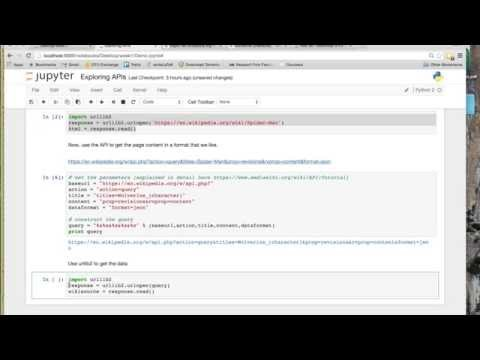

In [6]:
YouTubeVideo("9l5zOfh0CRo",width=800, height=450)

Now, to download the Zelda wiki pages of characters, we first need to collect the list of all characters in BotW, starting from the following pages:

1. [The list of allies](https://zelda.fandom.com/wiki/Characters_in_Breath_of_the_Wild)
2. [The list of enemies](https://zelda.fandom.com/wiki/Enemies_in_Breath_of_the_Wild)
3. [The list of bosses](https://zelda.fandom.com/wiki/Bosses_in_Breath_of_the_Wild)



> 
>  _Exercise 1_: Collect the list of BotW Characters 
>
> If you open any of the pages above, you will quickly see that characters are divided by their location in the game (allies) or type (enemies and bosses) and organized alphabetically, but, most importantly, their names are displayed in the form of links to their page. This means that if we use regular expressions to detect all links in the page description we will find them all! Let's get started:
> 1. for each page above, find the baseurl and title and build the related API query (add the parameter `rvslots=*` to your query's content)
> 2. use the query to collect the page (you can save it in a json file for future use) and extract its content
> 3. build a regular expression to find all characters' names (**hint**: all links in these pages have the same format, i.e. `{{Term|Series|name of character|link}}`)
> 4. add the characters names and their role (i.e. "Ally", "Enemy", and "Boss") in a Pandas DataFrame. How many unique characters did you find? How many of them are allies, enemies, and bosses? Are there any repeated characters? If so, drop the duplicates, then save the data in a csv file
>
> **Note**: 
> 1. In the Enemies page there is a section called "Traps", we do not want to include this list in our dataset
> 2. Some Bosses have a link in *parenthesis* to their location in the game, you should filter these links out

In [7]:
# Ex 1.1
import urllib.request

urla = 'https://zelda.fandom.com/wiki/Characters_in_Breath_of_the_Wild'
urle = 'https://zelda.fandom.com/wiki/Enemies_in_Breath_of_the_Wild'
urlb = 'https://zelda.fandom.com/wiki/Bosses_in_Breath_of_the_Wild'


response = urllib.request.urlopen(urla)
data = response.read()      # a `bytes` object
text = data.decode('utf-8')
text


baseurl = "https://zelda.fandom.com/api.php?"
action = "action=query"
title_a = "titles=Characters_in_Breath_of_the_Wild"
title_e = "titles=Enemies_in_Breath_of_the_Wild"
title_b = "titles=Bosses_in_Breath_of_the_Wild"
content = "prop=revisions&rvprop=content&rvslots=*"
dataformat ="format=json"

query_a = "{}{}&{}&{}&{}".format(baseurl, action, content, title_a, dataformat)
query_e = "{}{}&{}&{}&{}".format(baseurl, action, content, title_e, dataformat)
query_b = "{}{}&{}&{}&{}".format(baseurl, action, content, title_b, dataformat)


print(query_a)
print(query_e)
print(query_b)

https://zelda.fandom.com/api.php?action=query&prop=revisions&rvprop=content&rvslots=*&titles=Characters_in_Breath_of_the_Wild&format=json
https://zelda.fandom.com/api.php?action=query&prop=revisions&rvprop=content&rvslots=*&titles=Enemies_in_Breath_of_the_Wild&format=json
https://zelda.fandom.com/api.php?action=query&prop=revisions&rvprop=content&rvslots=*&titles=Bosses_in_Breath_of_the_Wild&format=json


In [8]:
# Ex 1.2 #
import json

wikiresponse = urllib.request.urlopen(query_a)
wikidata = wikiresponse.read()
wikitext_a = wikidata.decode('utf-8')
json_a = json.loads(wikitext_a)
#print(json_a)
#a_text = crap(json_a,77604)
a_text = json_a['query']['pages']['77604']['revisions'][0]['slots']['main']['*']
#print(a_text)
wikiresponse = urllib.request.urlopen(query_e)
wikidata = wikiresponse.read()
wikitext_e = wikidata.decode('utf-8')
json_e = json.loads(wikitext_e)
#e_text = crap(json_e,77608)
e_text = json_e['query']['pages']['77608']['revisions'][0]['slots']['main']['*']
# Take out everything after the ememies section of the webpage, i.e. Traps
e_filter = e_text.split('==Traps==')[0]

wikiresponse = urllib.request.urlopen(query_b)
wikidata = wikiresponse.read()
wikitext_b = wikidata.decode('utf-8')
json_b = json.loads(wikitext_b)
#print(json_b)
b_text = json_b['query']['pages']['77607']['revisions'][0]['slots']['main']['*']
print(b_text)

#print(e_filter)

<noinclude>{{DISPLAYTITLE: Bosses in {{BotW|-}}}}
The following is a list of [[Boss]]es from {{BotW}}.</noinclude>

==Overworld Bosses==
<gallery class="center">
File:BotW Stone Talus Model.png|{{Term|BotW|Stone Talus|link}}
File:BotW Stone Talus (Junior) Fight.jpg|{{Term|BotW|Stone Talus (Junior)|link}}<br>{{Small|''({{Term|BotW|Dueling Peaks South|link}})''}}
File:BotW Stone Talus (Senior) Fight.jpg|{{Term|BotW|Stone Talus (Senior)|link}}<br>{{Small|''({{Term|BotW|North Dueling Peaks|link}})''}}
File:BotW Stone Talus (Luminous) Model.png|{{Term|BotW|Stone Talus (Luminous)|link}}
File:BotW Stone Talus (Rare) Model.png|{{Term|BotW|Stone Talus (Rare)|link}}
File:BotW Igneo Talus Model.png|{{Term|BotW|Igneo Talus|link}}
File:BotW Frost Talus Model.png|{{Term|BotW|Frost Talus|link}}
File:BotW Hinox Model.png|{{Term|BotW|Hinox|link}}
File:BotW Hinox Model 2.jpg|{{Term|BotW|Hinox|link}} (Youngest Kin)<br>{{Small|''({{Term|BotW|Mount Taran|link}})''}}
File:BotW Hinox (Middle Kin) Model.png|{

In [9]:
# function that removes the term '|link' from the end of a list of matchings
def removelink(match):
    import regex as re
    list = []
    for m in match:
        tempmatch = re.search(r'\|link',m)
        if tempmatch:
            list.append(m[0:-5])
    return list

In [10]:
# Ex 1.3
import numpy as np

match_a = re.findall(r'\{\{Term\|BotW\|(.*?)\}\}',a_text)
match_e = re.findall(r'\{\{Term\|BotW\|(.*?)\}\}',e_filter)
# The part "[^(]" removes the links to locations that some of the bosses have
match_b = re.findall(r'[^(]\{\{Term\|BotW\|(.*?)\}\}',b_text)

#for m in match_b:
#    print(m)
#print("\n")

allies = removelink(match_a)
print(f'number of allies (before duplicates removed): {len(allies)}')
enemies = removelink(match_e)
print(f'number of enemies (before duplicates removed): {len(enemies)}')
bosses = removelink(match_b)
print(f'number of bosses (before duplicates removed): {len(bosses)}')

# Remove duplicates names from the lists of characters
allies = np.unique(np.array(allies))
fakeallies = [np.where(allies == 'Master Kohga')[0][0],np.where(allies == 'Calamity Ganon')[0][0]]
allies = np.delete(allies,fakeallies)
enemies = np.unique(np.array(enemies))
bosses = np.unique(np.array(bosses))
#print(f'\n{allies}')
print(f'\n{bosses}')

print(f'\nnumber of allies (after duplicates removed): {len(allies)}')
print(f'number of enemies (after duplicates removed): {len(enemies)}')
print(f'number of bosses (after duplicates removed): {len(bosses)}')

#NIKOLAJ: You have 2 too many allies because 2 of them are also bosses.
# You also need to remove the "bosses" that have parenthesis around them, i.e. ({{...}}), because they are links to other stuff (places I think)

number of allies (before duplicates removed): 573
number of enemies (before duplicates removed): 71
number of bosses (before duplicates removed): 25

['Black Hinox' 'Blue Hinox' 'Calamity Ganon' 'Dark Beast Ganon'
 'Fireblight Ganon' 'Frost Talus' 'Hinox' 'Igneo Talus'
 'Igneo Talus Titan' 'Master Kohga' 'Molduga' 'Molduking'
 'Monk Maz Koshia' 'Stalnox' 'Stone Talus' 'Stone Talus (Junior)'
 'Stone Talus (Luminous)' 'Stone Talus (Rare)' 'Stone Talus (Senior)'
 'Thunderblight Ganon' 'Waterblight Ganon' 'Windblight Ganon']

number of allies (after duplicates removed): 571
number of enemies (after duplicates removed): 63
number of bosses (after duplicates removed): 22


In [11]:
import pandas as pd
from itertools import chain

types = ["Ally","Enemy","Boss"]
pddict = [{"type": char_type, "name": name} for char_type,names in zip(types,[allies,enemies,bosses]) for name in names]
#print(pddict)
dfdata = [allies,enemies,bosses]
df = pd.DataFrame(data=pddict)
display(df)

df.to_csv('ZeldaCharacters.csv')

,type,name
0,Ally,Agus
1,Ally,Aji
2,Ally,Akh Va'quot
3,Ally,Akrah
4,Ally,Aliza
...,...,...
651,Boss,Stone Talus (Rare)
652,Boss,Stone Talus (Senior)
653,Boss,Thunderblight Ganon
654,Boss,Waterblight Ganon


You've made it! Now, you have a clean file listing all characters in BotW and their role. By following the same strategy you used to download the pages above, you can now use the API and download each character page. For each character, save the resulting page content in a txt file. 

**Note**: 
1. the name of the character corresponds to the title of its page (where spaces are replaced with underscores). So, the title of `Princess Zelda`'s page is `Princess_Zelda`
2. some of your character's names could actually redirect to a different page. Add a check to find any redirect in a page description. (**hint**: the description will be in the form `#REDIRECT [[PAGENAME]]` so you should use `PAGENAME` in your query instead)

In [12]:
allies

array(['Agus', 'Aji', "Akh Va'quot", 'Akrah', 'Aliza', 'Amali', 'Ami',
       'Amira', 'Anche', 'Anly', 'Ardin', 'Ariane', 'Armes', 'Ashai',
       'Ashe', 'Aster', 'Aurie Taamu', 'Axyl', 'Aya', 'Azu', 'Babi',
       'Baddek', 'Bamboo', 'Banji', 'Bareeda Naag', 'Bargoh', 'Barta',
       'Baumar', 'Bayge', 'Bazz', 'Bedoli', 'Beedle', 'Benja', 'Benny',
       'Bertri', 'Bladon', 'Bludo', 'Blynne', 'Bohrin', 'Boldon',
       'Bolson', 'Bosh Kala', 'Botrick', 'Bozai', 'Branli', 'Breen',
       'Brigo', 'Brokka', 'Bugut', 'Buliara', 'Cado', 'Calip', 'Calisa',
       'Calyban', 'Cambo', 'Canni', 'Canolo', 'Cara', 'Cecili', 'Celessa',
       'Chaas Qeta', 'Chabi', 'Cherry', 'Chessica', 'Chio', 'Chork',
       'Chumin', 'Cima', 'Claree', 'Clavia', 'Cleff', 'Cloyne', 'Cotera',
       'Cottla', 'Cree', 'Daag Chokah', 'Dabi', 'Dagah Keek', 'Dah Hesho',
       'Dah Kaso', 'Dai', 'Daka Tuss', 'Dako Tah', 'Dalia', 'Damia',
       'Danda', 'Danton', 'Dantz', 'Daqa Koh', 'Daqo Chisay', 'Darton',
     

In [13]:
def createstuff(title):
    baseurl = "https://zelda.fandom.com/api.php?"
    action = "action=query"
    title_a = "titles="+title
    content = "prop=revisions&rvprop=content&rvslots=*"
    dataformat ="format=json"

    query_a = "{}{}&{}&{}&{}".format(baseurl, action, content, title_a, dataformat)
    wikiresponse = urllib.request.urlopen(query_a)
    wikidata = wikiresponse.read()
    wikitext_a = wikidata.decode('utf-8')
    json_a = json.loads(wikitext_a)
    page0 = list(json_a['query']['pages'].keys())[0]
    a_text = json_a['query']['pages'][page0]['revisions'][0]['slots']['main']['*']
    return a_text

In [14]:
# Saving the character pages in txt file #
from tqdm.notebook import tqdm
import os
#script_dir = os.path.dirname(__file__) # <-- absolute dir the script is in
script_dir = os.getcwd()
folder_dir = "descriptions\\" 
path = os.path.join(script_dir, folder_dir)

characters = list(df['name'])
characters = [char.replace(" ","_") for char in characters]
#print(characters)
for char in tqdm(characters):
    try:
        temp = createstuff(char)
        with open(path+char+".txt",'w') as x:
            json.dump(temp,x)
    except:
        print(char)

'for char in tqdm(characters):\n    try:\n        temp = createstuff(char)\n        with open(path+char+".txt",\'w\') as x:\n            json.dump(temp,x)\n    except:\n        print(char)'

---

# Part B: Building the network

Now, we're going to build the BotW NetworkX directed graph, which includes all good characters, enemies, and bosses. 

The nodes in the network will be all the characters, and we will place an edge between nodes $A$ and $B$ if the Zelda wiki page of node $A$ links to the Zelda Wiki page of node $B$.

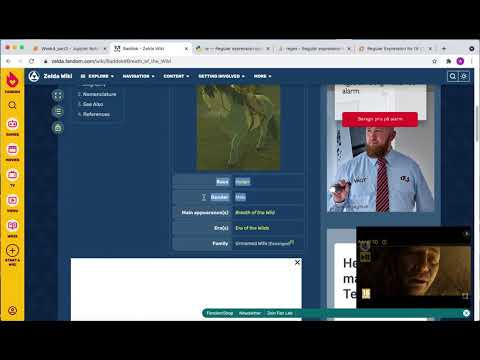

In [24]:
YouTubeVideo("eciQ6qgRD-4", width=800, height=450)

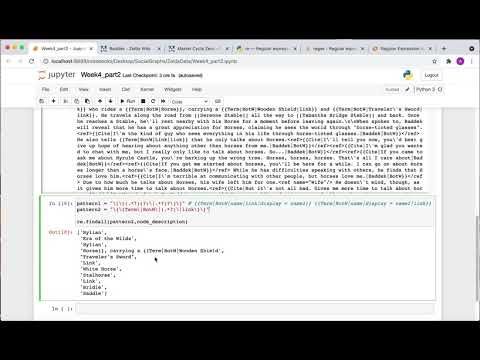

In [25]:
YouTubeVideo("J7SF0Xs2PHM", width=800, height=450)

> _Exercise 1_: Build the network of BotW Characters 
>
> Now we can build the network. Isn't this a little bit cool? What a dataset :)
>
> The overall strategy for this is the following: 
> Take the pages you have downloaded for each character. 
> Each page corresponds to a character, which is a node in your network. 
> Find the Race and Gender of a character in their Infobox and use regular expressions to extract them. Then, find all the hyperlinks in a character's page that link to another node of the network (e.g. another character). 
> There are many ways to do this, but below, I've tried to break it down into natural steps. 
> Keep in mind that the network should include all characters (allies, enemies, and bosses).
> 
>
> * Use regular expressions to extract all outgoing links from each of the pages you downloaded above. Remember that links have different [flavors](https://zelda.fandom.com/wiki/Guidelines:Getting_Started), these are the ones we need (they seem a lot but you've already built the patterns in 1. and 2. and just need to add a condition to them):
      1. direct links, i.e. [[name of character]] or {{Term|BotW|name of character|link}}
      2. links using text, i.e. [[Princess Zelda|Zelda]] or {{Term|Series|Princess Zelda|link|display=Zelda}}
      3. links to pages that have parentheses, i.e. [[Ocarina of Time (Item)|]] or {{Term|Series|Ocarina of Time (Item)|link}}
      4. links using plural terms, i.e. [[Heart]]s or {{Plural|Series|Heart|link}}
      5. links to sections of another page, i.e. [[Link#Breath of the Wild]] or {{Term|BotW|Link|link}}
>
> * For each link you extract, check if the target is a character. If yes, keep it. If no, discard it.
> * Use a NetworkX [`DiGraph`](https://networkx.github.io/documentation/development/reference/classes.digraph.html) to store the network. Store also the properties of the nodes (i.e. Role, Race, and Gender).
> * When you have finished, you'll notice that some nodes do not have any edge. Those are isolated nodes, you may *discard* them from the network.
>
> **Note**: When you add a node to the network, also include an `attribute` for each node characteristic (i.e. an attribute that specifies Role, Race, and Gender)

In [15]:
links = []
for node in tqdm(characters):
    try:
        with open(path+node+".txt","r") as f:
            node_description = f.read()
        
        pattern1 = r'\[\[(.*?)(?:\|.*?|\#Breath of the Wild)?\]\]'
        pattern2 = r'\{\{(?:Plural|Term)\|BotW\|(.*?)(?:\|display.*?)?(\|link)?(?:\|display.*?)?\}\}'
        
        #find patterns of two types and filter non-links
        links_pattern1 = list(re.findall(pattern1, node_description))
        links_pattern2 = [l[0] for l in re.findall(pattern2, node_description) if "|link" in l]
        
        links_total = [l for l in set(links_pattern1+links_pattern2) if l in df.name.values]
        
        links.append(links_total)

    except:
        print("failure with: ",node)

  0%|          | 0/656 [00:00<?, ?it/s]

failure with:  Granté


In [16]:
links

[['Link'],
 ['Offrak', 'Fyson', 'Pelison'],
 [],
 ['Zumi', 'Onya', 'Link', 'Garshon'],
 ['Link'],
 ['Cree', 'Kotts', 'Kass', 'Notts', 'Kheel', 'Genli'],
 ['Yolero', 'Izra', 'Link'],
 ['Azu', 'Pruce', 'Ivee', 'Link', 'Purah', 'Nikki'],
 ['Pokki', 'Link', 'Furosa'],
 ['Cima', 'Shay', 'Link', 'Kampo'],
 ['Nellie', 'Estan', 'Spera', 'Jules'],
 ['Lester', 'Galli', 'Link'],
 ['Sebasto', 'Link', 'Numar'],
 ['Dina', 'Risa', 'Pasha', 'Link'],
 ['Kish', 'Breen', 'Shamae', 'Link'],
 ['Bolson', 'Medda', 'Karin', 'Link'],
 ['Isha', 'Ashai'],
 ['Dorill', 'Pelison'],
 ['Rudi', 'Khini', 'Robbie'],
 ['Amira', 'Karin', 'Sefaro', 'Pruce', 'Ivee', 'Purah', 'Link'],
 ['Teake', 'Smaude', 'Malena', 'Link', 'Marta'],
 ['Yammo', 'Nazbi', 'Link', 'Savelle'],
 ['Baumar'],
 ['Malanya',
  'Hylia',
  'Chork',
  'Dabi',
  'Kenyo',
  'Konba',
  'Sho',
  'Ena',
  'Geggle'],
 [],
 ['Bludo', 'Yunobo', 'Link'],
 ['Riju', 'Leena', 'Liana', 'Link', 'Kotta', 'Perda'],
 ['Bamboo', 'Selmie', 'Falmark'],
 ['Kabetta', 'Daruk', 

In [27]:
L_onelist = [y for x in links for y in x]
print(f'number of links found: {len(L_onelist)}')

number of links found: 1589


In [28]:
list_dict = {df.name.values[i]: x for i,x in enumerate(links) for y in x if (y in df.name.values)}
list_dict

{'Agus': ['Link'],
 'Aji': ['Offrak', 'Fyson', 'Pelison'],
 'Akrah': ['Garshon', 'Link', 'Zumi', 'Onya'],
 'Aliza': ['Link'],
 'Amali': ['Kheel', 'Notts', 'Kass', 'Kotts', 'Genli', 'Cree'],
 'Ami': ['Izra', 'Link', 'Yolero'],
 'Amira': ['Link', 'Azu', 'Pruce', 'Purah', 'Ivee', 'Nikki'],
 'Anche': ['Furosa', 'Link', 'Pokki'],
 'Anly': ['Link', 'Shay', 'Cima', 'Kampo'],
 'Ardin': ['Jules', 'Spera', 'Nellie', 'Estan'],
 'Ariane': ['Lester', 'Link', 'Galli'],
 'Armes': ['Numar', 'Sebasto', 'Link'],
 'Ashai': ['Dina', 'Link', 'Risa', 'Pasha'],
 'Ashe': ['Link', 'Shamae', 'Kish', 'Breen'],
 'Aster': ['Bolson', 'Link', 'Medda', 'Karin'],
 'Aurie Taamu': ['Ashai', 'Isha'],
 'Axyl': ['Dorill', 'Pelison'],
 'Aya': ['Khini', 'Robbie', 'Rudi'],
 'Azu': ['Sefaro', 'Amira', 'Link', 'Pruce', 'Purah', 'Ivee', 'Karin'],
 'Babi': ['Link', 'Marta', 'Smaude', 'Teake', 'Malena'],
 'Baddek': ['Savelle', 'Link', 'Yammo', 'Nazbi'],
 'Bamboo': ['Baumar'],
 'Banji': ['Ena',
  'Konba',
  'Sho',
  'Geggle',
  'Ch

In [140]:
import networkx as nx
G = nx.DiGraph()
nodes_with_attributes = [(df_a.Name[i],{'Role':df_a.Role[i],'Race':df_a.Race[i],'Gender':df_a.Gender[i]}) for i in df_a.index]
G.add_nodes_from([x for x in df.name.values])
G.add_edges_from([(x,i) for x in list_dict for i in list_dict[x]])
print(f'num nodes: {G.number_of_nodes()}')
print(f'num edges: {G.number_of_edges()}')


num nodes: 656
num edges: 1589


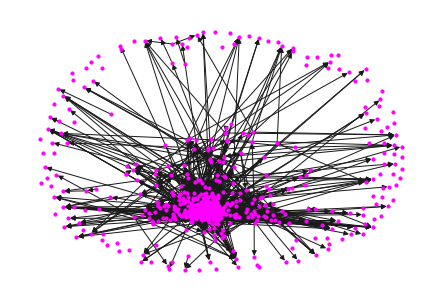

In [120]:
nx.draw_spring(G,node_size=10,node_color='magenta')

In [121]:
# Remove isolated nodes from the network
G.remove_nodes_from(list(nx.isolates(G)))


> *Exercise 2*: Simple network statistics and analysis
>
> * What is the number of nodes in the network? 
> * More importantly, what is the number of links?
> * Plot the distributions of Role, Race, and Gender.
> * Plot the total (in+out), in and out-degree distributions. What do you observe? Can you explain why the in-degree distribution is different from the out-degree distribution?
>     * Compare the degree distribution to a *random network* with the same number of nodes and *p*
>     * Compare the degree distribution to a *scale-free* network with the same number of nodes.
> * Who is the top connected character in BotW? (Report results for the undirected network, in-degrees and out-degrees). Comment on your findings. Is this what you would have expected?
> * Who are the top 5 most connected allies (again in terms of all edges, and in/out-degree)?
> * Who are the top 5 most connected enemies -- bosses included -- (again in terms of all edges in/out-degree)?

> The total degree distribution (in + out degree) for you network should resemble the distribution displayed on the image below *(`Isolated` means that we have discarded the nodes with zero degrees)*:
![img](https://github.com/SocialComplexityLab/socialgraphs2021/blob/main/files/week4_degrees.png?raw=true)
> *Tip:* If you want your `matplotlib` plots to look like the one above, you can download the `seaborn` package and do the following: `import seaborn as sns
sns.set()`


In [122]:
# Number of nodes and links
print(f'num nodes: {G.number_of_nodes()}')
print(f'num edges: {G.number_of_edges()}')

num nodes: 570
num edges: 1589


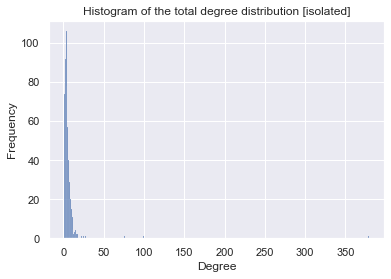

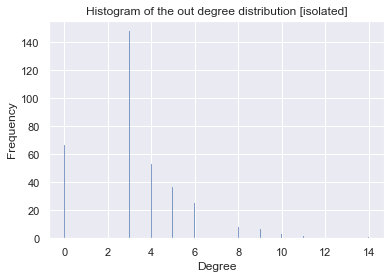

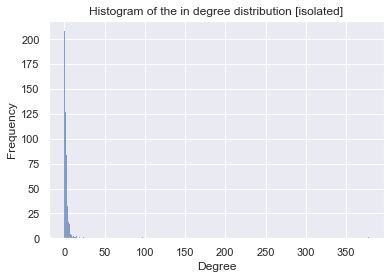

In [277]:
# Plot in + out degree distributions
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

deg_list = [y for x,y in G.degree()]
sns.histplot(deg_list,bins=400)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Histogram of the total degree distribution [isolated]')
plt.show()

out_nodes = [x for x,y in G.edges]
out_deg = [out_nodes.count(i) for i in np.unique(G.edges)]

in_nodes = [y for x,y in G.edges]
in_deg = [in_nodes.count(i) for i in np.unique(G.edges)]

sns.histplot(out_deg,bins=400)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Histogram of the out degree distribution [isolated]')
plt.show()

sns.histplot(in_deg,bins=400)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Histogram of the in degree distribution [isolated]')
plt.show()

In [124]:
# find the most connected node
print(max(G.degree(), key=lambda x: x[1]))


('Link', 379)


# Week 5 ---------------------------------------------------------------------------------------

We will continue to work with the network from last week, see the lecture for [Week 4](https://nbviewer.jupyter.org/github/socialcomplexitylab/socialgraphs2021/blob/main/lectures/Week4.ipynb) for details. This is important! Actually, in order to continue with the lecture, you *need* to complete Week 4. 

**Important:** To help you with this task and to make sure you have downloaded all characters pages, I have put together the list of characters and their attributes in a [csv file](https://github.com/SocialComplexityLab/socialgraphs2021/blob/main/files/ZeldaBotW_nodes_w_attributes_enriched.csv). Use this file to add nodes with attributes to your network and make sure to find all descriptions and links from the [Zelda Wiki](https://zelda.fandom.com/wiki/Main_Page)!

*Exercise 1:* Build the right graph for visualization:

>1. Use NetworkX `DiGraph` to store the network of characters. Remember that characters are linked if they have a corresponding link between their Zelda Wiki contents.
>   * **Additionally**, extract the largest component - it will make our work with visualizations much easier (note: removing *isolated* nodes (with no links) does not guarantee that you are left with the largest component).
>     - *Note 1*: You probably have the right graph if you have more than 500 nodes and more than 1500 edges.
>     - *Note 2*: For directed graphs use `weakly connected component` to extract the largest component.
>     - *Note 3*: Further analysis is done with the largest component
>2. As you build the graph, store the attributes of the nodes (remember the `role`,`race`, and `gender`). On top of that, let's also store the `length of the content` as one of the attributes of the node (i.e. count the number of *words* you have in each character's page). By storing this information as nodal features, we keep all the relevant data in one place. The safe way to count words without counting symbols is to use `regex`, but simpler methods are OK.

In [208]:
# Get the race and gender attributes from Anna's csv file
path_acsv = 'C:/Users/Nikolaj/OneDrive - Danmarks Tekniske Universitet/DTU/Kandidat/3. semester/Social Graphs and Interactions/socialgraphs2021/files/ZeldaBotW_nodes_w_attributes_enriched.csv'
df_a = pd.read_csv(path_acsv)
display(df_a)
print(df_a[df_a.Name == 'Granté'])

# Get new order of characters from Anna's csv file
characters_a = list(df_a.Name.values)
characters_a = [char.replace(" ","_") for char in characters_a]

# add a column with the word count of each character page
df_a['Word_count'] = [len(re.findall(r'\w+',open(path+word+".txt","r").read())) if word != 'Granté' else 0 for word in characters_a]
display(df_a)

# Create Digraph with attributes
import networkx as nx
G = nx.DiGraph()
nodes_with_attributes = [(df_a.Name[i],{'Role':df_a.Role[i],'Race':df_a.Race[i],'Gender':df_a.Gender[i],'Word_count':df_a.Word_count[i]}) for i in df_a.index]
G.add_nodes_from(nodes_with_attributes)
G.add_edges_from([(x,i) for x in list_dict for i in list_dict[x]])
print(f'num nodes: {G.number_of_nodes()}')
print(f'num edges: {G.number_of_edges()}')


,Name,Role,Race,Gender
0,Baddek,Ally,Hylian,Male
1,Bamboo,Ally,Horse,Unknown
2,Banji,Ally,Hylian,Female
3,Baumar,Ally,Hylian,Male
4,Bayge,Ally,Goron,Male
...,...,...,...,...
651,Waterblight Ganon,Boss,Unknown,Unknown
652,Master Kohga,Boss,Sheikah,Male
653,Monk Maz Koshia,Boss,Sheikah,Male
654,Calamity Ganon,Boss,Gerudo,Male


      Name  Role    Race Gender
82  Granté  Ally  Hylian   Male


,Name,Role,Race,Gender,Word_count
0,Baddek,Ally,Hylian,Male,1619
1,Bamboo,Ally,Horse,Unknown,276
2,Banji,Ally,Hylian,Female,1006
3,Baumar,Ally,Hylian,Male,976
4,Bayge,Ally,Goron,Male,1254
...,...,...,...,...,...
651,Waterblight Ganon,Boss,Unknown,Unknown,968
652,Master Kohga,Boss,Sheikah,Male,1633
653,Monk Maz Koshia,Boss,Sheikah,Male,2017
654,Calamity Ganon,Boss,Gerudo,Male,2153


num nodes: 656
num edges: 1589


In [210]:
# Remove isolated nodes from the network
G.remove_nodes_from(list(nx.isolates(G)))
print(f'num nodes after removing isolates: {G.number_of_nodes()}')
print(f'num edges after removing isolates: {G.number_of_edges()}')
# Extract the largest component LC
LC = max(nx.weakly_connected_components(G),key=len)
#print(LC)

num nodes after removing isolates: 570
num edges after removing isolates: 1589


*Exercise 2:* Let's build a simple visualization of the network
>1. For the sake of the visualisation, let's convert our network to *undirected graph* (tip: There is a NetworkX command to help you).
>   * *Note*: Keep the directed graph, we will use it in couple of the following exercises
>2. Use the NetworkX command `nx.draw_kamada_kawai` to draw the resulting undirected network. (You can find [background on the algorithm here](https://en.wikipedia.org/wiki/Force-directed_graph_drawing).)  
>   * Node color should depend on the `role` attribute (i.e. use different colors for allies, enemies, and bosses)
>   * Set up your plot so that node-size depends on the node *degree*
>   * **Optional**: Set up you plot so that edge color depends on the `role` attribute. If an edge connects allies assign `color_a`, if the edge connects enemies/bosses assign `color_b`, in other cases assign `color_c` (i.e. when allies connect to either enemies or bosses). (Here, you get to decide on the colors.)

In [218]:
# convert Digraph to undirected graph
G_u = G.to_undirected()

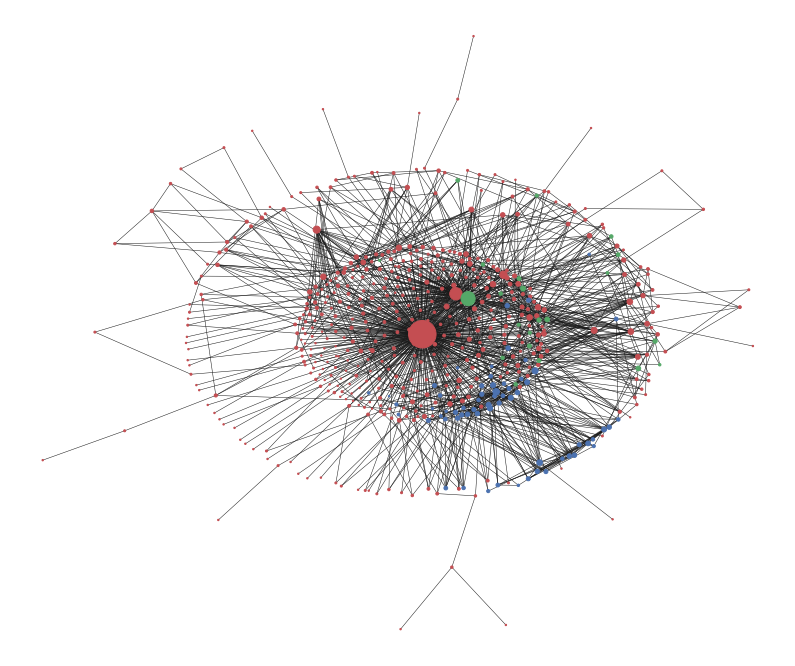

In [251]:
# Plot the undirected graph with different colors for each role, and different sizes of nodes depending on degree

d = dict(G_u.degree)

color_choice = {'Ally':'r','Enemy':'b','Boss':'g'}
colors = [color_choice[x] for x in nx.get_node_attributes(G_u,'Role').values()]


fig,ax = plt.subplots(1,figsize=(14,12))
nx.draw_kamada_kawai(G_u, node_color=colors ,nodelist=d.keys(), node_size=[v*2 for v in d.values()],ax=ax,width=0.5)

*Exercise 3:* From the previous plot it is more difficult to observe any specific structure in the network. We can make even better visualisations with `ForceAtlas2` package:
>1. [Force Atlas 2 algorithm](https://github.com/bhargavchippada/forceatlas2) helps to determine the positions of the nodes (see what the result looks like below).
>2.You can install the  package typing `pip install fa2` in the terminal. The [github page](https://github.com/bhargavchippada/forceatlas2) explains how to use the package to get coordinates for each node.
>   * (**Hint**: if you install force atlas and Python can't find the package it might be because you computer tries to use the system's `pip`, therefore, try installing using the Anaconda pip explicitly ( on mac you would use `~/anaconda2/bin/pip install fa2`).
> * Visualize the network using the [Networkx draw function](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw.html#networkx.drawing.nx_pylab.draw), and node-coordinates from the force atlas algorithm. As in the previous Exercise:
>   * Node color should depend on the `role` attribute (i.e. use different colors for allies, enemies, and bosses)
>   * Node size should depend on the node *degree*
>   * **Optional**: edge color should depend on the `role` attribute. If an edge connects allies assign `color_a`, if the edge connects enemies/bosses assign `color_b`, in other cases assign `color_c` (i.e. when allies connect to either enemies or bosses).
> * Play with the force atlas algorithm parameters to obtain a visualization you like. It may look similar to the one below (but not necessarily). 
> * Describe the structure you observe. Can you identify nodes with a privileged position in the network? Do you observe chains of connected nodes? Do you see any interesting group of nodes (can you guess who's involved)?
>   * **Optional**: try to color nodes on the basis of Gender or Race and compare these plots with the previous one. Can you further characterize the structures you've observed? Do you observe new ones?

![Network](https://github.com/SocialComplexityLab/socialgraphs2021/blob/main/files/Network_fa2.png?raw=true)

In [252]:
!pip install fa2

*Exercise 4*: We continue with a qualitative inspection of the Zelda Wiki pages, that will help us to intepret our results. We investigate the reasons for links between characters to exist on Zelda Wiki.

>1. Consider the top 3 nodes with highest in-degree in the network. Open the corresponding Zelda Wiki page.
>   * Consider the set of neighbours pointing towards the node found above. Look for them in the page. 
>   * What is the relation between the characters you identified and his/her network neighbours? (e.g., do they have the same role, are they opponents). You don't need to come up with a grand theory of BotW here, I just want you to think about how links come about.
>   * Repeat the exercise for the top 3 out-degree node. 
>   * Are there differences between reasons for out- and in-links? Again, there's no right answer here. I just want you to think about some of the reasons why links may occur between characters.
>2. Are there any nodes with high out-degree and with few incoming connections? If yes, open the Zelda Wiki pages of such characters and explain what happens?
>3. Are there any nodes with high in-degree and few outcoming connections? Again, open Zelda Wiki pages of such characters and explain what happens? 
>4. From the plot of the network (in *Exercise 3*), we can see that 2 nodes with highest degrees (other than Link) have many common neighbors. 
    * Can you identify who these characters are? Are they opponents? How many common neighbors do they have? 
    * Can you characterize the common neighbors in terms of their Gender and Race? What about their Zelda Wiki pages (do they have a specific role in the BotW story)?

### 1.

In [316]:
# Extract the top 3 nodes with highest in-degree in the network
top3in_deg = sorted(G.in_degree(),key=lambda x: x[1],reverse=True)[:3]
print(top3in_deg)
# Extract the wiki pages (txt files) from these top 3 and save in a list
top3in_wiki = [open(path+word[0].replace(" ","_")+".txt","r").read() for word in top3in_deg]

[('Link', 378), ('Calamity Ganon', 97), ('Hylia', 67)]


In [319]:
# https://zelda.fandom.com/wiki/Link - Main character, Hero. Is controlled by the goddess Hylia
# https://zelda.fandom.com/wiki/Calamity_Ganon - Biggest boss/enemy. Great King of Evil, enemy of Hylia
# https://zelda.fandom.com/wiki/Hylia - Goddess, she influences the world

In [320]:
# Get the list of neighbours for each of the top 3 in-deg nodes
[list(G.neighbors(top3in_deg[0][0])),list(G.neighbors(top3in_deg[1][0])),list(G.neighbors(top3in_deg[2][0]))]

[['Stalnox'],
 ['Link', 'Princess Zelda', 'Calamity Ganon'],
 ['Bokoblin',
  'Link',
  'King Rhoam',
  'Purah',
  'Princess Zelda',
  'Paya',
  'Hylia',
  'Fire Wizzrobe',
  'Calamity Ganon']]

In [322]:
# Extract the top 3 nodes with highest out-degree in the network
top3out_deg = sorted(G.out_degree(),key=lambda x: x[1],reverse=True)[:3]
print(top3out_deg)
# Extract the wiki pages (txt files) from these top 3 and save in a list
top3out_wiki = [open(path+word[0].replace(" ","_")+".txt","r").read() for word in top3out_deg]

# Get the list of neighbours for each of the top 3 out-deg nodes
[list(G.neighbors(top3out_deg[0][0])),list(G.neighbors(top3out_deg[1][0])),list(G.neighbors(top3out_deg[2][0]))]

[('Tray', 14), ('Snow Octorok', 12), ('Keese', 11)]


[['Link',
  'Muava',
  'King Rhoam',
  'Riju',
  'Strade',
  'Ploka',
  'Farosh',
  'Naydra',
  'Lyndae',
  'Princess Zelda',
  'Molduking',
  'Ashai',
  'Molduga',
  'Dinraal'],
 ['Lizalfos',
  'Golden Lizalfos',
  'Link',
  'Black Lizalfos',
  'Silver Lizalfos',
  'Electric Lizalfos',
  'Fire-Breath Lizalfos',
  'Ice-Breath Lizalfos',
  'Cursed Lizalfos',
  'Stalkoblin',
  'Stalmoblin',
  'Blue Lizalfos'],
 ['Golden Lizalfos',
  'Link',
  'Black Lizalfos',
  'Silver Lizalfos',
  'Electric Lizalfos',
  'Fire-Breath Lizalfos',
  'Ice-Breath Lizalfos',
  'Cursed Lizalfos',
  'Moblin',
  'Blue Lizalfos',
  'Stalizalfos']]

In [323]:
# https://zelda.fandom.com/wiki/Tray
# https://zelda.fandom.com/wiki/Snow_Octorok
# https://zelda.fandom.com/wiki/Keese

### 2.

In [324]:
#...